# Центральная предельная теорема для распределения $\chi^{2}$

In [209]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as pyplot

### Описание распределения $\chi^2$

Распределение $\chi^{2}$ (хи-квадрат) с $k$ степенями свободы — это распределение суммы квадратов $k$ независимых стандартных нормальных случайных величин.

Сгенерируем выборку объёма  $1000$ из распределения $\chi^2$ с двумя степенями свободы $k$ и посчитаем теоретическую плотность распределения

In [142]:
k = 2
sample = np.random.chisquare(k, 1000)

x = np.linspace(0, 14, 1000)
rv = stats.chi2(k)
pdf = rv.pdf(x)

Построим гистограмму по выборке и нарисуем поверх неё теоретическую плотность распределения случайной величины 

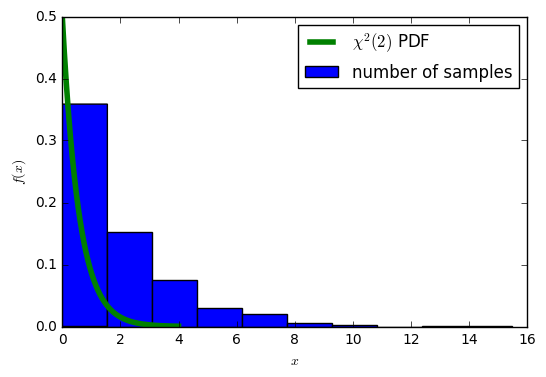

In [200]:
pyplot.hist(sample, normed=True, label="number of samples")
pyplot.plot(x, pdf, linewidth=4, label="$\chi^2(%i)$ PDF" % k)

pyplot.legend()
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')

### Оценка распределения выборочного среднего случайной величины при разных объёмах выборок.

Среднее значение для распределения $\chi^2$ равно степени свободы $k$, а дисперсия равна $2k$.

Построим гистограммы распределений выборочных средних из 1000 выборок объёма $n$ (5, 10, 50) и нарисуем плотность соответствующего нормального распределения

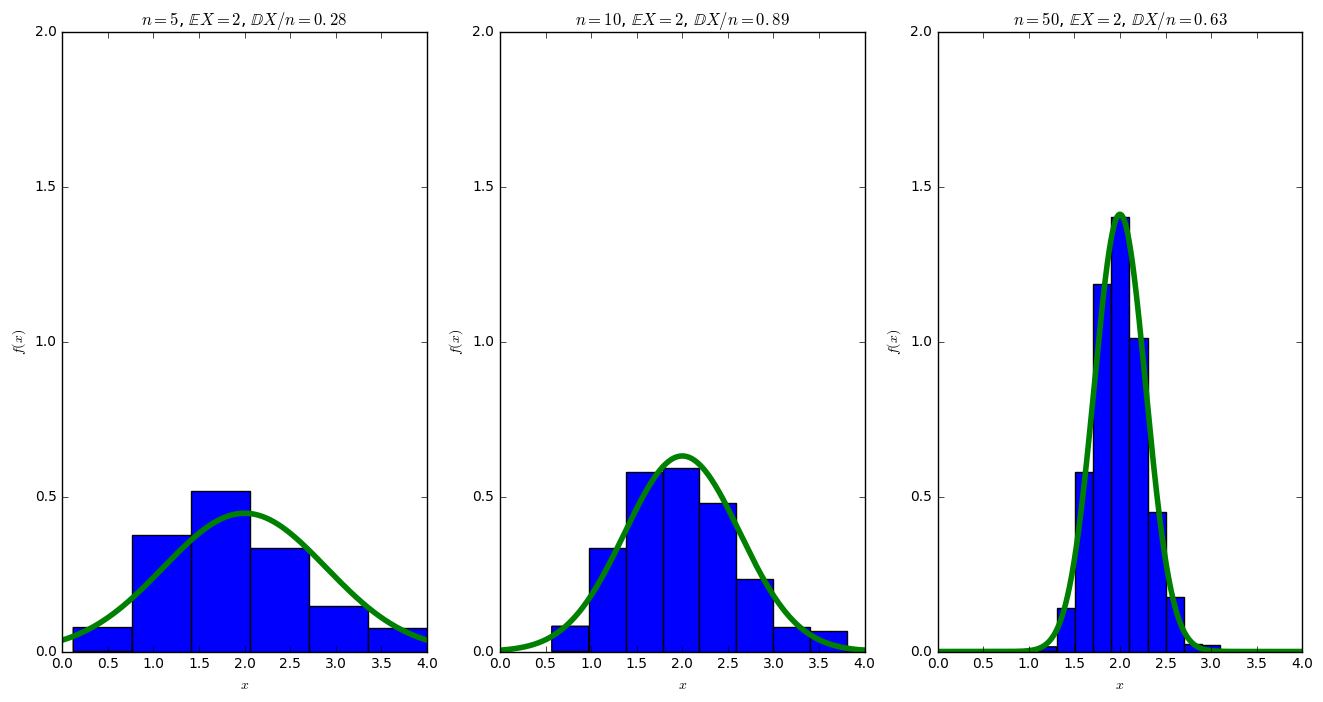

In [208]:
mu = k
sample_count = 1000
sample_sizes = [5, 10, 50]

# функция вычисления среднего из выборки размера n
mean = lambda n: lambda _: np.mean(rv.rvs(size=n))

fig = pyplot.figure(figsize=(16, 8))
for i, n in enumerate(sample_sizes):
    subplot = fig.add_subplot(1, 3, i + 1)
    subplot.set_xlim([0, 2*k])
    subplot.set_ylim([0, k])

    plt.title("$n = %i$, $\mathbb{E}X = %i$, $\mathbb{D}X/n = %.2f$" % (n, mu, sigma))
    pyplot.legend()
    pyplot.xlabel('$x$')
    pyplot.ylabel('$f(x)$')    
    
    # вычисление выборочных средних
    means = map(mean(n), xrange(sample_count))
    pyplot.hist(means, normed=True, label="number of samples")
    
    # вычисление плотности соответствующего нормального распределения
    sigma = math.sqrt(2*k/float(n))
    norm_rv = stats.norm(loc=mu, scale=sigma)
    x = np.linspace(0, 2*k, 1000)
    norm_pdf = norm_rv.pdf(x)
    plt.plot(x, norm_pdf, linewidth=4, label="$N(%i, %.2f)$ PDF" % (mu, sigma))

plt.show()

### Вывод

Центральная предельная теорема работает для распределения $\chi^2$ с двумя степенями свободы (скошенно влево). С ростом $n$ точность аппроксимации распределения выборочных средних нормальным распределением увеличивается. 